In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(219)

## hyperparameters

In [2]:
k_armed_bandit = 10

max_steps = 1000
max_episodes = 2000

## definition of function and class

In [3]:
class k_armed_bandit_machine:
  def __init__(self, k_armed_bandit):
    self.k_armed_bandit = k_armed_bandit
    
    self.reward_dist_mean = np.random.normal(loc=0.0, scale=1.0, size=[self.k_armed_bandit])
    #print("reward_dist_mean: expected reward q*")
    #print(self.reward_dist_mean)

    #reward_dist_stddev = np.random.uniform(low=0.0, high=2.0, size=[k_armed_bandit])
    self.reward_dist_stddev = np.ones(self.k_armed_bandit)
    #print("reward_dist_stddev: standard deviation of expected reward q*")
    #print(self.reward_dist_stddev)
    
    self.optimal_action = np.argmax(self.reward_dist_mean)
    #print("optimal_action:", self.optimal_action)

  def pulling_arm(self, arm_number):
    """pull k armed bandit machine given arm_number
    Args:
      arm_number: int, machine number we select. [0, k_armed_bandit-1]

    Returns:
      reward: reward of the machine we select from normal distribution.
    """
    assert arm_number < self.k_armed_bandit
    return np.random.normal(loc=self.reward_dist_mean[arm_number],
                            scale=self.reward_dist_stddev[arm_number])
  
  def get_optimal_action(self):
    return self.optimal_action

In [4]:
class q_function:
  def __init__(self, k_armed_bandit):
    self.q_values = np.zeros(k_armed_bandit)
    self.q_values_count = np.zeros(k_armed_bandit)
    
  def select_action(self):
    return np.argmax(self.q_values)
  
  def update(self, reward, action):
    self.q_values_count[action] += 1
    self.q_values[action] += (reward - self.q_values[action]) / self.q_values_count[action]

## Training

### one episode, $\epsilon = 0.1$ for test

In [5]:
epsilon = 0.1

my_bandit = k_armed_bandit_machine(k_armed_bandit)
my_q = q_function(k_armed_bandit)
for step in range(max_steps):  
  # epsilon greedy method
  if epsilon < np.random.rand():
    action = my_q.select_action()
  else:
    action = np.random.choice(k_armed_bandit)
  #print(action)

  reward = my_bandit.pulling_arm(action)
  #print(reward)
  my_q.update(reward, action)

### 2000 episodes, $\epsilon = 0.1$

In [6]:
epsilon = 0.1

average_rewards_1 = np.zeros(max_steps)
optimal_action_1 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)
    
  my_bandit = k_armed_bandit_machine(k_armed_bandit)
  my_q = q_function(k_armed_bandit)
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)

    if action == my_bandit.get_optimal_action():
      optimal_action_1[step] += 1.0
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_1[step] += reward
    my_q.update(reward, action)
    
average_rewards_1 /= max_episodes
optimal_action_1 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


### 2000 episodes, $\epsilon = 0.01$

In [7]:
epsilon = 0.01

average_rewards_2 = np.zeros(max_steps)
optimal_action_2 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)
    
  my_bandit = k_armed_bandit_machine(k_armed_bandit)
  my_q = q_function(k_armed_bandit)
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)

    if action == my_bandit.get_optimal_action():
      optimal_action_2[step] += 1.0
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_2[step] += reward
    my_q.update(reward, action)
    
average_rewards_2 /= max_episodes
optimal_action_2 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


### 2000 episodes, $\epsilon = 0.0$

In [8]:
epsilon = 0.0

average_rewards_3 = np.zeros(max_steps)
optimal_action_3 = np.zeros(max_steps)

for episode in range(max_episodes):
  if episode % 100 == 0:
    print("episode: ", episode)
    
  my_bandit = k_armed_bandit_machine(k_armed_bandit)
  my_q = q_function(k_armed_bandit)
  for step in range(max_steps):
    # epsilon greedy method
    if epsilon < np.random.rand():
      action = my_q.select_action()
    else:
      action = np.random.choice(k_armed_bandit)

    if action == my_bandit.get_optimal_action():
      optimal_action_3[step] += 1.0
      
    reward = my_bandit.pulling_arm(action)
    average_rewards_3[step] += reward
    my_q.update(reward, action)
    
average_rewards_3 /= max_episodes
optimal_action_3 /= max_episodes

episode:  0
episode:  100
episode:  200
episode:  300
episode:  400
episode:  500
episode:  600
episode:  700
episode:  800
episode:  900
episode:  1000
episode:  1100
episode:  1200
episode:  1300
episode:  1400
episode:  1500
episode:  1600
episode:  1700
episode:  1800
episode:  1900


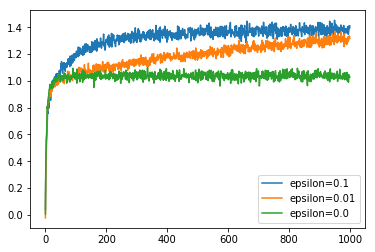

In [9]:
plt.plot(range(max_steps), average_rewards_1, label='epsilon=0.1')
plt.plot(range(max_steps), average_rewards_2, label='epsilon=0.01')
plt.plot(range(max_steps), average_rewards_3, label='epsilon=0.0')
plt.legend()
plt.show()

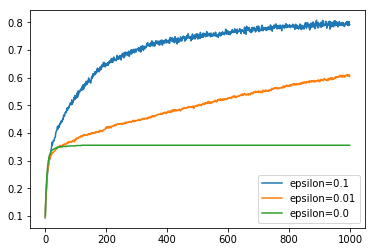

In [10]:
plt.plot(range(max_steps), optimal_action_1, label='epsilon=0.1')
plt.plot(range(max_steps), optimal_action_2, label='epsilon=0.01')
plt.plot(range(max_steps), optimal_action_3, label='epsilon=0.0')
plt.legend()
plt.show()